In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Important Notes : 
1. This is a completation of the first notebook [Data_PreProcessing_Script](https://www.kaggle.com/code/abdelrahmanmohamed20/data-preprocessing-script) Therefor be sure that the data is processed to YOLO formate first to be able to train the algorithm.
2. In this notebook You may have to change the paths of models, and folders to suit your directory, in our case we were working on our Drive.

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.51 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.6/107.7 GB disk)


### Model training phase
Note the model contineued the training from last itiration and is set to save weights in every itiration to avoid session time outs before finishing training.

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/last.pt')  # load a pretrained model (recommended for training)

# Use the model
results = model.train(data='/content/drive/MyDrive/Money_Train/custom_data.yaml', epochs=25,  project= '/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam',save_period=1, resume=True )  # train the model


Ultralytics YOLOv8.0.51 🚀 Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/last.pt, data=/content/drive/MyDrive/Money_Train/custom_data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, save_period=1, cache=False, device=None, workers=8, project=/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, min_memory=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, au

  0%|          | 0.00/755k [00:00<?, ?B/s]


                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.Conv                  [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.Conv                  [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.C2f                   [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.C2f                   [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.C2f                   [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256

  0%|          | 0.00/6.23M [00:00<?, ?B/s]

AMP: checks failed ❌. Anomalies were detected with AMP on your system that may lead to NaN losses or zero-mAP results, so AMP will be disabled during training.
optimizer: SGD(lr=0.01) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias
train: Scanning /content/drive/.shortcut-targets-by-id/1-A7zgCwUaJ4Gmx61F_OPNuZM1FSnGmEQ/Money_Train/15-2-Train Data/labels/train.cache... 8000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8000/8000 [00:00<?, ?it/s]
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /content/drive/.shortcut-targets-by-id/1-A7zgCwUaJ4Gmx61F_OPNuZM1FSnGmEQ/Money_Train/15-2-Train Data/labels/val.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]
Plotting labels to /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/labels.jpg... 
Resuming training from /content/drive/M

### Evaluating the model after training by predicting on some few images

In [ ]:
from ultralytics.yolo.v8.segment.val import plot_images
from numpy.lib.npyio import savetxt
from ultralytics import YOLO
import cv2
from PIL import Image
from matplotlib import pyplot as plt

model = YOLO('/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/epoch6.pt') # epoch 11,6
# results = model.val()  # evaluate model performance on the validation set

results = model('/content/drive/MyDrive/Money_Train/habd/habd_asli/', save=True, save_txt = True, conf=0.4)  # predict on an image

# success = model.export(format='onnx')  # export the model to ONNX format

In [ ]:
import os
import matplotlib.pyplot as plt

path = '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3'

# Get a list of all image filenames in the folder
image_files = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
print(image_files)

# Plot all images in a figure
fig, axes = plt.subplots(nrows=1, ncols=len(image_files), figsize=(20,20))
for i, image_file in enumerate(image_files):
    image = plt.imread(image_file)
    axes[i].imshow(image)
    axes[i].axis('off')
    
plt.show()


['/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/1.jpg', '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/3.jpg', '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/2.jpg', '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/4.jpg', '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/5.jpg', '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/TestImg.jpg', '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/all.jpg']


### Displaying the Predicted images as sometimes the code above does not show them

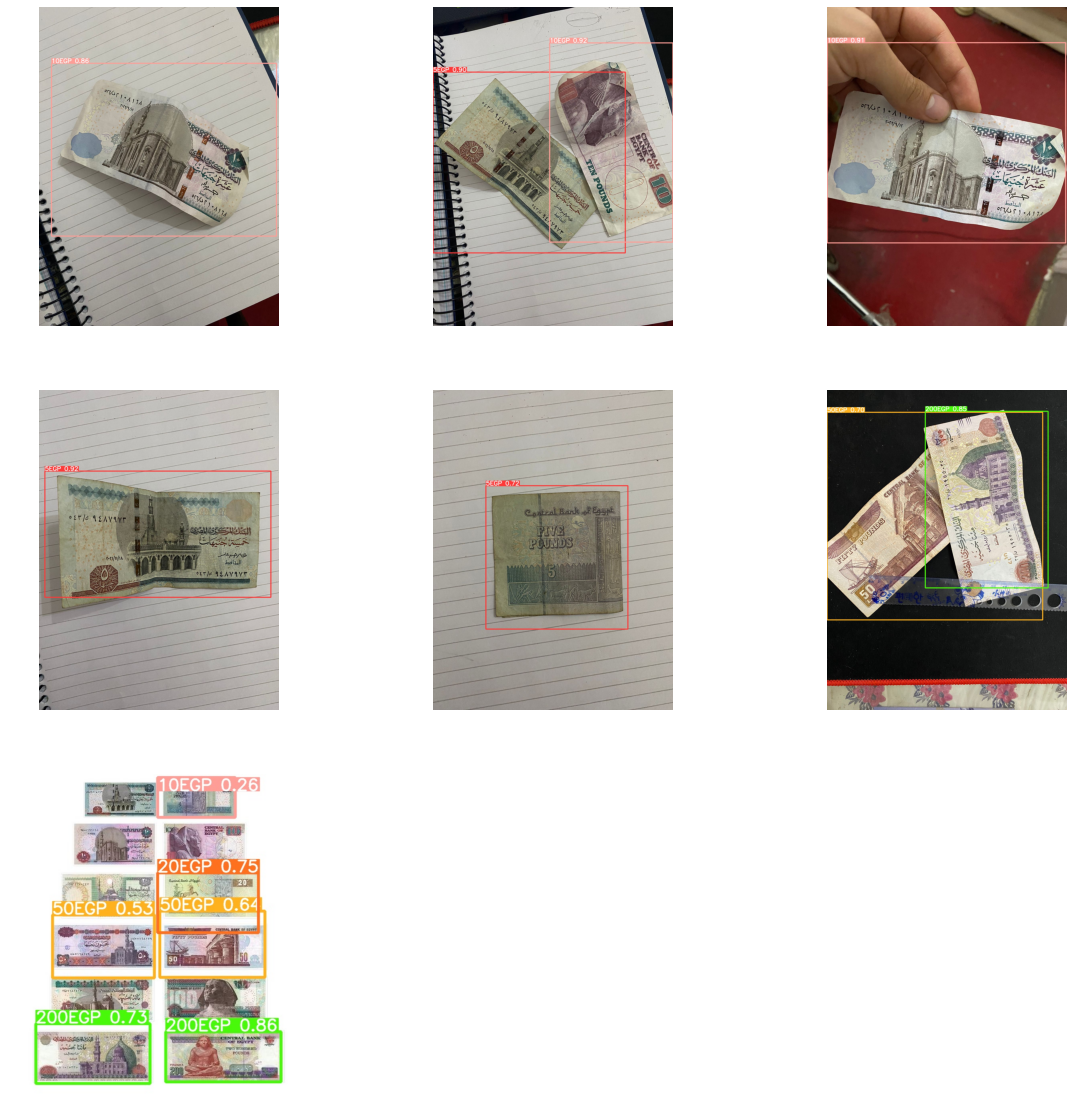

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Set the path to the folder containing the images
folder_path = "/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3"

# Get a list of all image files in the folder
image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and f.endswith('.jpg')]

# Set the dimensions of the figure grid (cols x rows)
cols = 3
rows = 3

# Create a new figure
fig = plt.figure(figsize=(20,20))

# Loop through the image files and plot each one in a subplot
for i, image_file in enumerate(image_files):
    # Load the image using cv2
    img = cv2.imread(os.path.join(folder_path, image_file))

    # Convert the image from BGR to RGB (cv2 uses BGR by default)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Add the image to the figure subplot
    ax = fig.add_subplot(rows, cols, i+1)
    ax.imshow(img)
    ax.axis('off')

# Show the figure
plt.show()


### Code for saving the Predicted Images locally in 1 picture

In [ ]:
import cv2
import os
import numpy as np
folder_path = '/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3'

# Get a list of image file names in the folder
image_names = os.listdir(folder_path)

# Create a blank image to hold the plotted images
num_images = len(image_names)
max_cols = 4
max_rows = num_images // max_cols + 1
canvas_width = 400 * max_cols
canvas_height = 400 * max_rows
canvas = np.zeros((canvas_height, canvas_width, 3), dtype=np.uint8)

# Plot each image on the canvas
for i, image_name in enumerate(image_names):
    # Read the image and resize it
    image_path = os.path.join(folder_path, image_name)
    image = cv2.imread(image_path)
    image = cv2.resize(image, (400, 400))

    # Calculate the position to plot the image on the canvas
    col = i % max_cols
    row = i // max_cols
    x = col * 400
    y = row * 400

    # Plot the image on the canvas
    canvas[y:y+400, x:x+400, :] = image

# Save the plotted image
cv2.imwrite('/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/predict3/Eval.png', canvas)


True

### training / val / predict using yolo commands (optional)

In [ ]:
!yolo train model=yolov8s.pt data=/content/drive/MyDrive/Money_Train/custom_data.yaml epochs=25 imgsz=640 save_period=1 batch=16 project=/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam


In [ ]:
!yolo val /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train3/weights/last.pt data=custom_data.yaml

In [ ]:
!yolo predict model=/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train3/weights/last.pt imgsz=640 conf=0.3 source=/content/drive/MyDrive/Money_Train/habd/habd_asli/

In [ ]:
import os
import shutil

source_folder = "/content/runs/detect/predict3/"
destination_folder = "/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/"

shutil.move(source_folder,destination_folder)

# # get a list of all files in the source folder
# file_list = os.listdir(source_folder)

# # loop through each file and move it to the destination folder
# for file_name in file_list:
#     # generate the full path to the source and destination files
#     source_file = os.path.join(source_folder, file_name)
#     destination_file = os.path.join(destination_folder, file_name)
    
#     # move the file from the source to the destination
#     shutil.move(source_file, destination_file)


### Converting the model to tflite so it can be used easily on mobile application

In [ ]:
from ultralytics.yolo.v8.segment.val import plot_images
from numpy.lib.npyio import savetxt
from ultralytics import YOLO
import cv2
from PIL import Image
from matplotlib import pyplot as plt

model = YOLO('/content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best.pt') # epoch 11,6
# results = model.val()  # evaluate model performance on the validation set

# results = model('/content/drive/MyDrive/Money_Train/habd/habd_asli/IMG_2013.MOV', save=True)  # predict on an image

success = model.export(format='tflite')  # export the model to ONNX format

Ultralytics YOLOv8.0.50 🚀 Python-3.8.10 torch-1.13.1+cu116 CPU
Model summary (fused): 168 layers, 11127906 parameters, 0 gradients, 28.4 GFLOPs

PyTorch: starting from /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 10, 8400) (85.4 MB)
requirements: YOLOv8 requirements "onnx" "onnx2tf>=1.7.7" "sng4onnx>=1.0.1" "onnxsim>=0.4.17" "onnx_graphsurgeon>=0.3.26" "tflite_support" "onnxruntime" not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 60.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.6/319.6 KB 27.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 KB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

[Errno 2] No such file or directory: '/usr/local/lib/python3.8/dist-packages/protobuf-3.19.6.dist-info/METADATA'


ONNX: simplifying with onnxsim 0.4.17...
ONNX: export success ✅ 4.0s, saved as /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best.onnx (42.6 MB)

TensorFlow SavedModel: running onnx2tf -i /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best.onnx -o /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best_saved_model -nuo --non_verbose 
TensorFlow SavedModel: export success ✅ 76.8s, saved as /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best_saved_model (106.7 MB)

TensorFlow Lite: starting export with tensorflow 2.11.0...
TensorFlow Lite: export success ✅ 0.0s, saved as /content/drive/MyDrive/Money_Train/habd/elmodels_eltmam/train11/weights/best_saved_model/best_float32.tflite (42.6 MB)

Export complete (79.0s)
Results saved to /content/drive/.shortcut-targets-by-id/1-A7zgCwUaJ4Gmx61F_OPNuZM1FSnGmEQ/Money_Train/habd/elmodels_eltmam/train11/weights
Predict:         yolo predict task=detect mo

In [ ]:
import shutil
source_folder = "/content/runs/detect/predict3/IMG_2013.mp4"
destination_folder = "/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/"

shutil.move(source_folder,destination_folder)

'/content/drive/MyDrive/Money_Train/habd/habd_mahbood/Yolov8/IMG_2013.mp4'